2024-11-25 07:35:52.270042: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-25 07:35:52.281621: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732494952.294530   50409 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732494952.298325   50409 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-25 07:35:52.311689: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Best model for ADRO.JK saved as ../models/LSTM_ADRO.JK.pkl
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


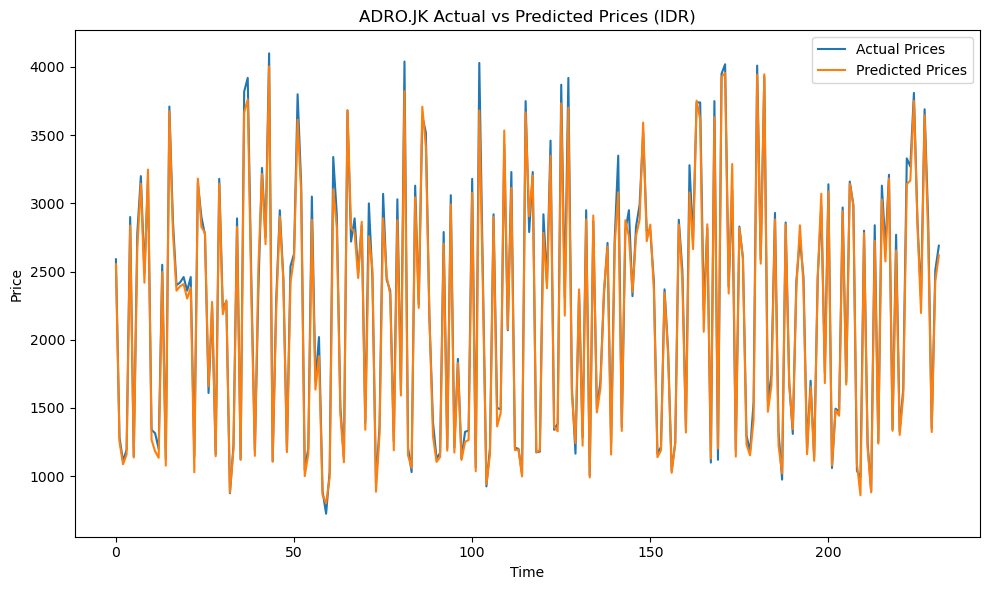

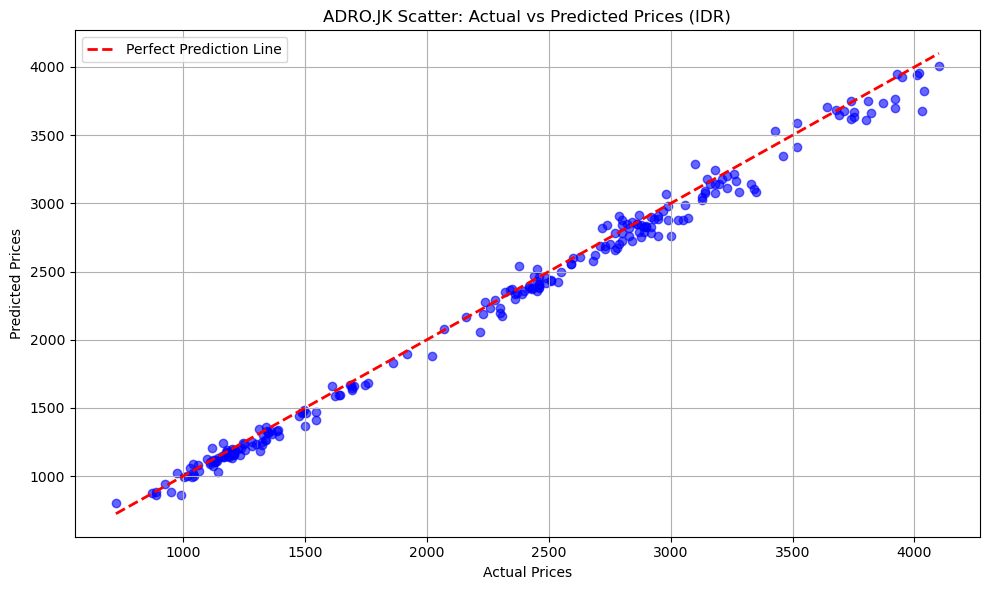

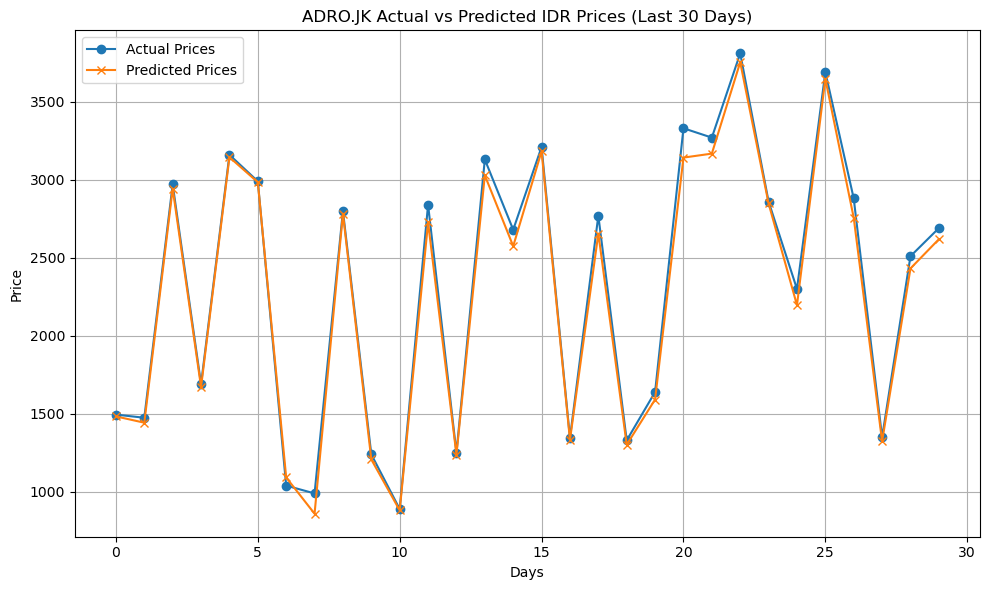

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Best model for BBCA.JK saved as ../models/LSTM_BBCA.JK.pkl
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


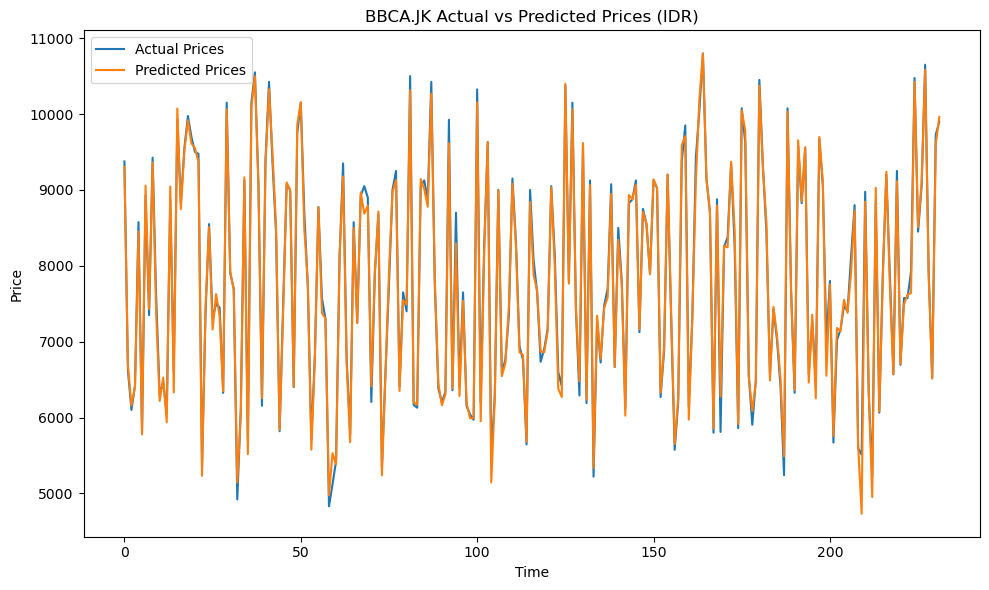

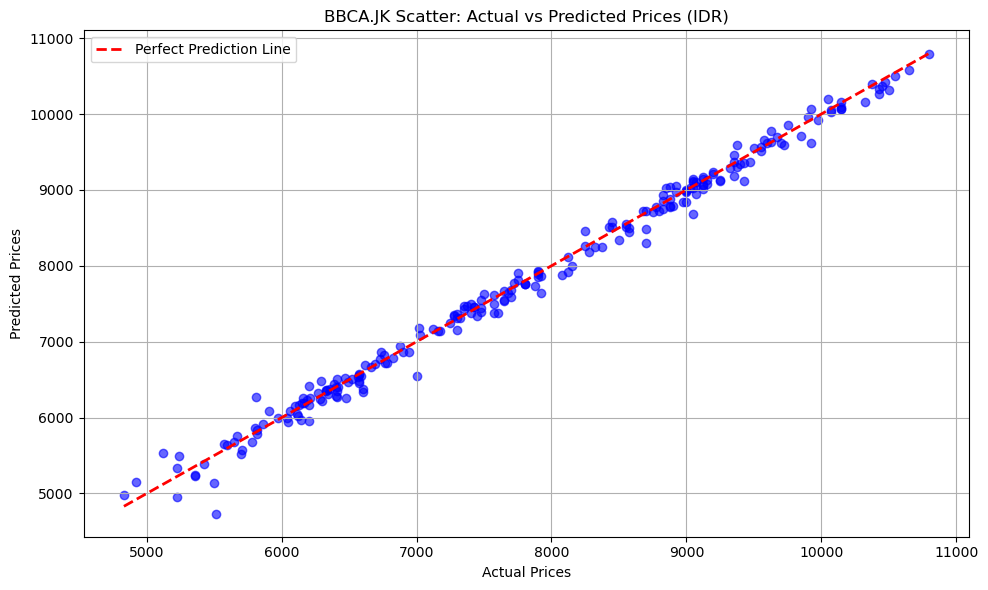

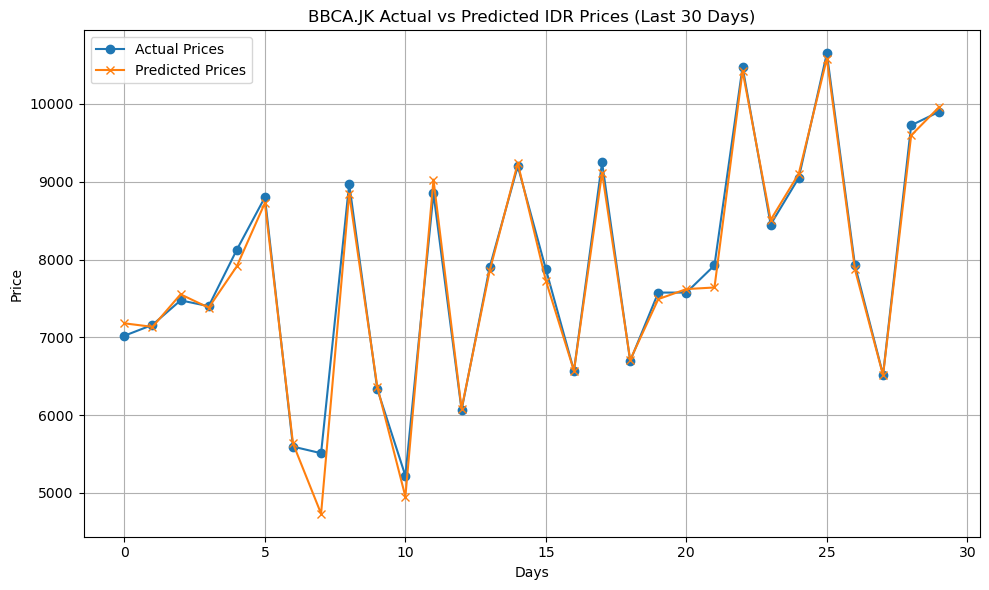

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Best model for TLKM.JK saved as ../models/LSTM_TLKM.JK.pkl
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


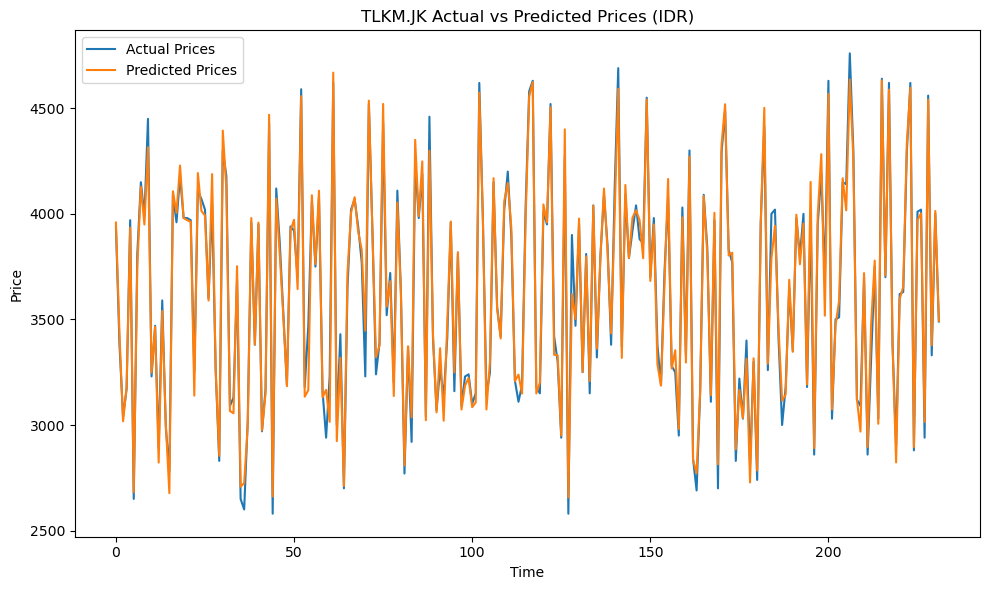

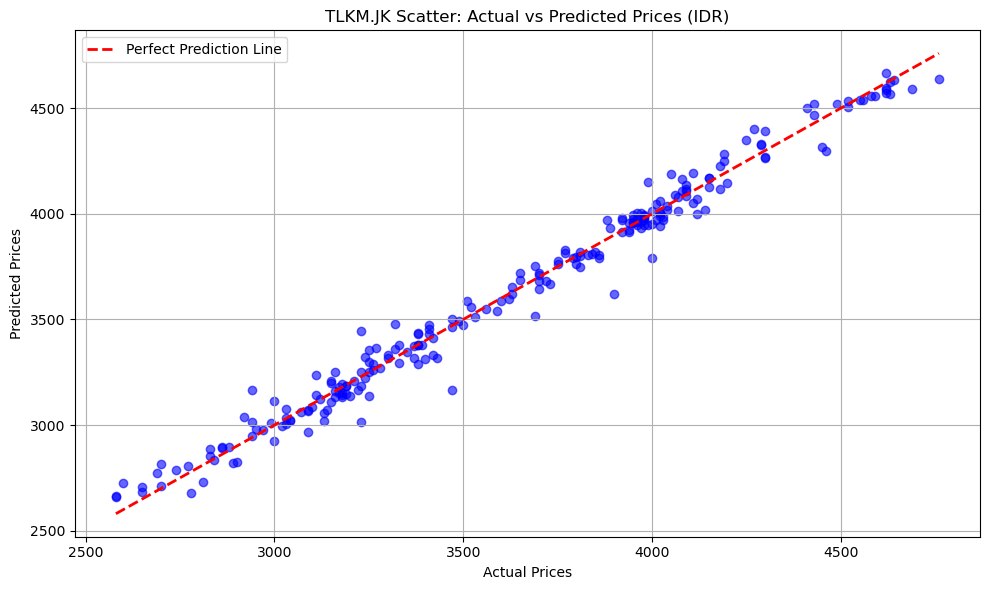

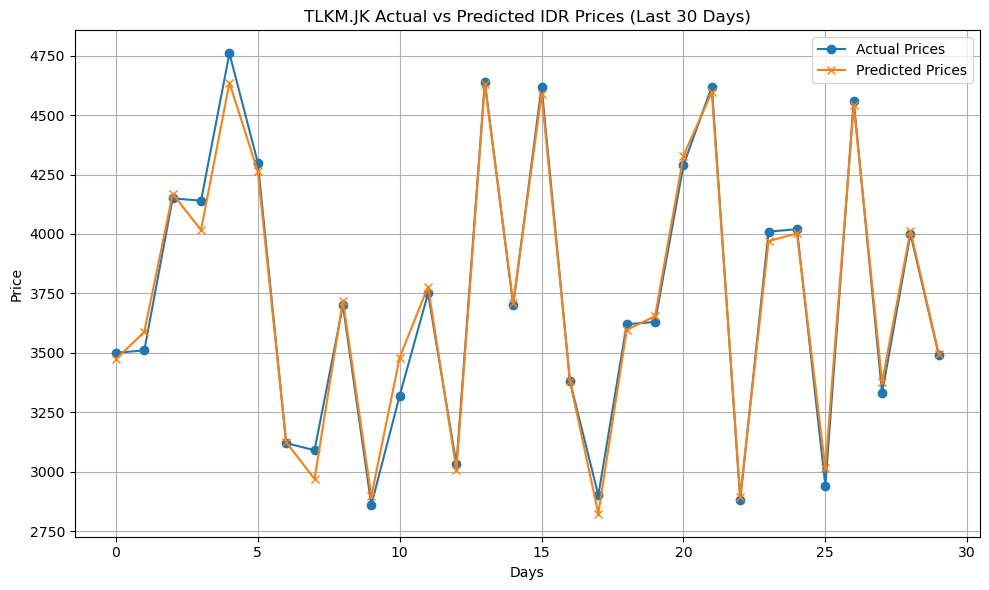


Elapsed time (HH:MM:SS): 0:03:52


In [1]:
def main():
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Input
    from tensorflow.keras.optimizers import Adam
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import random
    import yfinance as yf
    from datetime import datetime, timedelta
    import matplotlib.pyplot as plt
    import json
    import os
    import pickle

    tickers = ['ADRO.JK', 'BBCA.JK', 'TLKM.JK']
    start_date = '2020-01-01'
    end_date = datetime.today().strftime('%Y-%m-%d')
    
    start_time = datetime.now()

    # Load dataset
    data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', interval='1d')
    data.columns = ['_'.join(col).strip() for col in data.columns]

    evaluation_results = []
    future_predictions_all = {}

    for ticker in tickers:
        close_prices = data[f'{ticker}_Close'].values.reshape(-1, 1)
        
        # Normalize data
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(close_prices)

        # Create sequences
        def create_sequences(data, seq_length):
            X, y = [], []
            for i in range(len(data) - seq_length):
                X.append(data[i:i + seq_length])
                y.append(data[i + seq_length])
            return np.array(X), np.array(y)

        seq_length = 30
        X, y = create_sequences(scaled_data, seq_length)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Build and train LSTM
        def build_and_train_lstm(units, learning_rate):
            model = Sequential([
                Input(shape=(seq_length, 1)),
                LSTM(units, return_sequences=True),
                LSTM(units),
                Dense(1)
            ])
            model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
            model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
            return model

        # Hyperparameter tuning
        param_grid = {"units": [32, 50, 64], "learning_rate": [0.001, 0.01, 0.1]}
        best_model = None
        best_mse = float('inf')

        for _ in range(10):
            params = {k: random.choice(v) for k, v in param_grid.items()}
            model = build_and_train_lstm(params["units"], params["learning_rate"])
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            if mse < best_mse:
                best_mse = mse
                best_model = model
        model_filename = f"../models/LSTM_{ticker}.pkl"
        with open(model_filename, "wb") as file:
            pickle.dump(best_model, file)
        print(f"Best model for {ticker} saved as {model_filename}")
                            

        # Evaluate best model
        final_predictions = best_model.predict(X_test)
        mse = mean_squared_error(y_test, final_predictions)
        mae = mean_absolute_error(y_test, final_predictions)     

        evaluation_results.append({"Ticker": ticker, "MSE": mse, "MAE": mae})

        # Plot: Actual vs Predicted Prices
        plt.figure(figsize=(10, 6))
        plt.plot(scaler.inverse_transform(y_test), label="Actual Prices")
        plt.plot(scaler.inverse_transform(final_predictions), label="Predicted Prices")
        plt.title(f"{ticker} Actual vs Predicted Prices (IDR)")
        plt.xlabel("Time")
        plt.ylabel("Price")
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"../outputs/LSTM_{ticker}_Actual_Predicted.png")
        plt.show()            
        print("")  
        
        # Inverse transform the data to original scale if using a scaler
        actual_prices = scaler.inverse_transform(y_test)
        predicted_prices = scaler.inverse_transform(final_predictions)
        
        # Scatter Plot: Predicted vs Actual Prices
        plt.figure(figsize=(10, 6))
        plt.scatter(actual_prices, predicted_prices, alpha=0.6, color='blue')
        plt.plot([actual_prices.min(), actual_prices.max()], 
                 [actual_prices.min(), actual_prices.max()], 
                 'r--', lw=2, label="Perfect Prediction Line")
        plt.title(f"{ticker} Scatter: Actual vs Predicted Prices (IDR)")
        plt.xlabel("Actual Prices")
        plt.ylabel("Predicted Prices")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"../outputs/LSTM_{ticker}_Scatter_Actual_Predicted.png")
        plt.show()


        # Assume y_test and final_predictions are numpy arrays
        # Get the last 30 data points for the past month
        last_30_actual = y_test[-30:]
        last_30_predicted = final_predictions[-30:]
        
        # Inverse transform the data back to original scale if using a scaler
        last_30_actual = scaler.inverse_transform(last_30_actual)
        last_30_predicted = scaler.inverse_transform(last_30_predicted)
        
        # Plot: Actual vs Predicted Prices (Last 30 Days)
        plt.figure(figsize=(10, 6))
        plt.plot(last_30_actual, label="Actual Prices", marker='o')
        plt.plot(last_30_predicted, label="Predicted Prices", marker='x')
        plt.title(f"{ticker} Actual vs Predicted IDR Prices (Last 30 Days)")
        plt.xlabel("Days")
        plt.ylabel("Price")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"../outputs/LSTM_{ticker}_Actual_Predicted_Last_30_Days.png")
        plt.show()      
        

    # Save evaluation results to CSV
    eval_df = pd.DataFrame(evaluation_results)
    eval_df.to_csv("../outputs/LSTM_Evaluation_Results.csv", index=False)

    end_time = datetime.now()
    duration = str(end_time - start_time).split('.')[0]
    print("\nElapsed time (HH:MM:SS):", duration)


if __name__ == "__main__":
    main()
